In [38]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [39]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:,1:].values
labels = data.iloc[:,0].values

In [40]:
print(data.shape)
data.head()

(32, 13)


,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)
print(f'{pca.n_components_} axes sont à retenir pour conserver au minimum 90% de la variance.')

2 axes sont à retenir pour conserver au minimum 90% de la variance.


In [ ]:
def interpretation(pca_comp , data):
    f1, f2 = pca_comp[0], pca_comp[1]
    name = list(data.columns[1:])
    plt.bar(name, f1)
    plt.show()

    plt.bar(name, f2)
    plt.show()

In [ ]:
def scale_pca(X,labels):
    # On normalise les données
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    # On calcule le PCA
    pca = PCA(n_components=0.9)
    pca.fit(X_scaled)
    X_pca_scaled = pca.transform(X_scaled)

    # Affichage des résultats en nuage de points
    plt.scatter(X_pca_scaled[:,0],X_pca_scaled[:,1])
    for I, x, y in zip(labels, X_pca_scaled[:,0], X_pca_scaled[:,1]):
        plt.annotate(I, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.show()

    return pca.components_


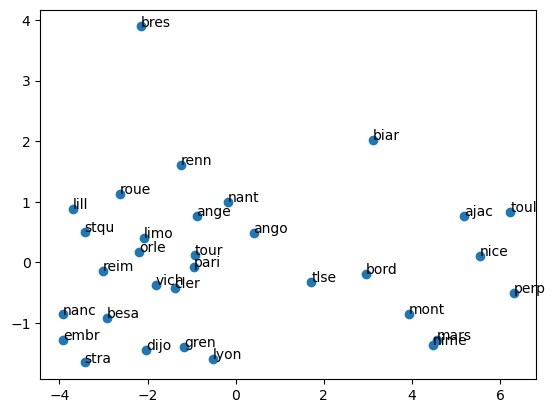

In [ ]:
pca_comp_villes = scale_pca(X,labels)

**Les axes principaux peuvent être interprétés ainsi :**
- Le premier axe attribue des poids similaires à tous les mois, ce qui signifie qu\' il capture la température moyenne d'une ville.
- Le second axe attribue des poids positifs importants aux mois froids, et des poids néfatifs importants aux mois chauds, il est donc destiné à capturer l'importance des écarts de températures entre les saisons.

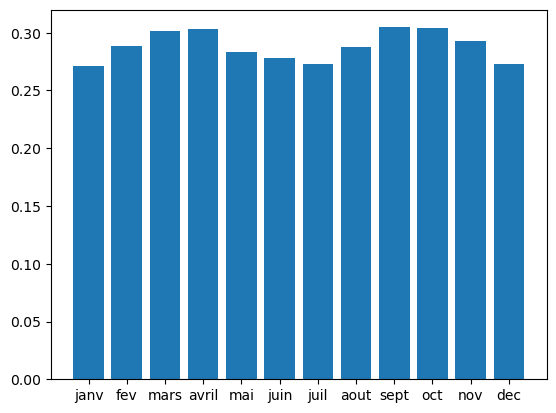

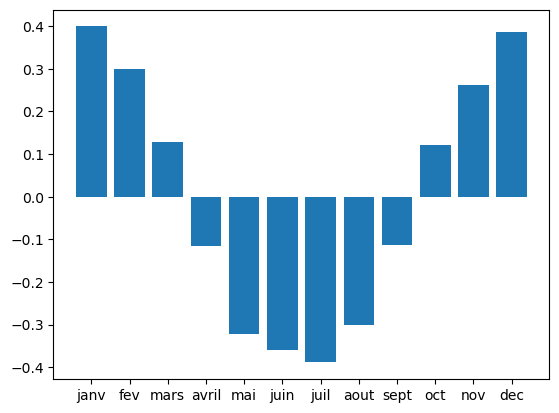

In [ ]:
interpretation(pca_comp_villes, data)

In [ ]:
dataCrimes = pd.read_csv('./crimes.csv', sep=';')
Crimes = dataCrimes.iloc[:,1:].values
labelsCrimes = dataCrimes.iloc[:,0].values
print(dataCrimes.shape)
dataCrimes.head()

(50, 8)


,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


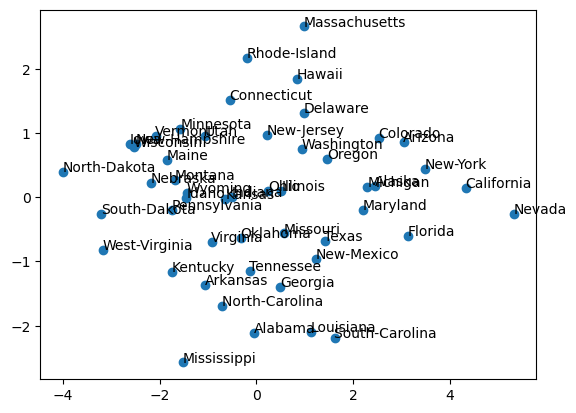

In [ ]:
pca_comp_crimes = scale_pca(Crimes,labelsCrimes)

- Premier axe : moyenne des crimes (à quel point une ville est criminelle)
- Deuxieme axe : répartition de l'importance de chaque crime (la plupart de la criminalité est liée au vol de voitures)

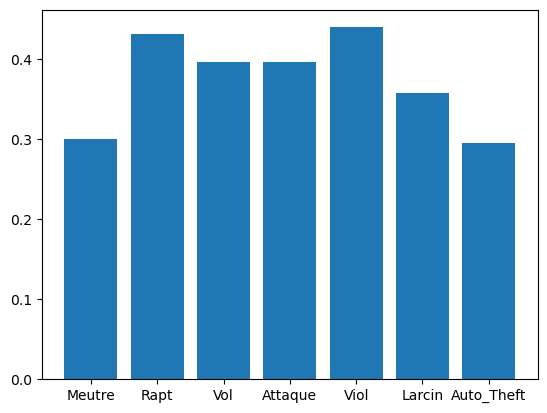

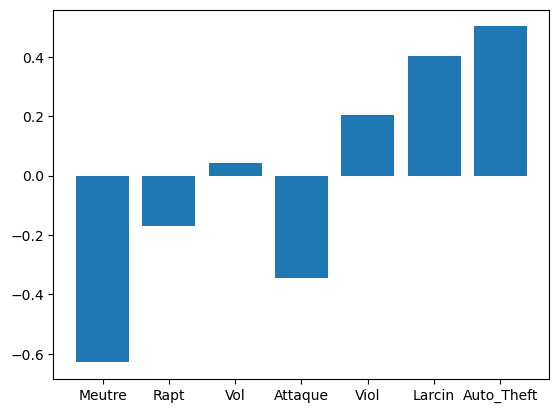

In [ ]:
interpretation(pca_comp_crimes, dataCrimes)

In [ ]:
dataStartups = pd.read_csv('./50_Startups.csv', sep=';')
Startups = dataStartups.iloc[:,1:].values
labelsStartups = dataStartups.iloc[:,0].values
print(dataStartups.shape)
dataStartups.head()

(50, 5)


,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


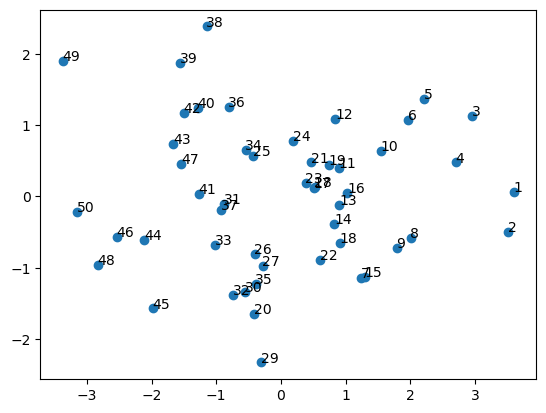

[[ 0.59347855  0.14737886  0.52064694  0.59580992]
 [-0.04048087 -0.95051314  0.30797098  0.00632069]]


In [ ]:
pca_comp_startups = scale_pca(Startups,labelsStartups)
print(pca_comp_startups)

- Le premier axe renvoie a une moyenne assez uniformément pondérée sur les dépenses R&D, Marketing et sur le bénéfice. Il prend peu en compte les dépénses adminsitratives sans pour autant les négliger. 
- Le second axe contraste fortement avec le premier et inclus (avec un poids négatif important les dépénses administratives) avec peu de considération pour les autres facteurs explicatifs. Il permet de repérer les entreprises effectuant d'importants investissements dans leur structure administrative. 
- On peut ajouter que la "complementarité" (en valeur absolue) entre les histogrammes suggère que ces 2 axes expliquent beaucoup de variance, ce qui est cohérent avec le fait qu'on a seulement 4 facteurs.

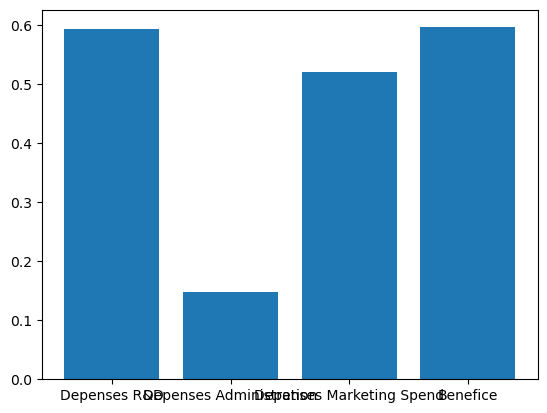

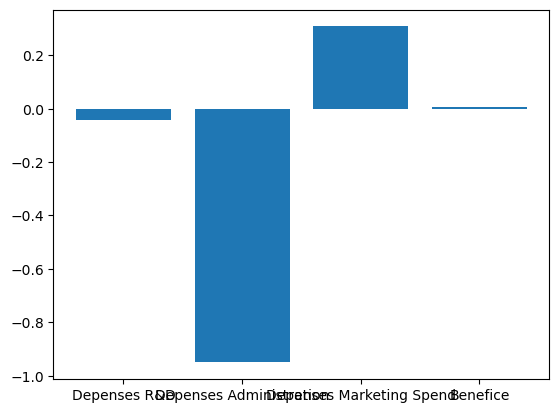

In [ ]:
interpretation(pca_comp_startups, dataStartups)